In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import numpy as np
%matplotlib inline
import pygmo as pg
from pygmo import algorithm
import os
import sys
import json
from orbsim.r3b_2d import UNIT_TIME
from orbsim.r3b_2d.analyticals import *
from orbsim.r3b_2d.simulators import launch_sim
from orbsim.plotting import orbitplot2d, orbitplot_non_inertial
import time
from random import shuffle
from numba import jit
import math
from math import pi

pi8=pi/8
pi4=pi/4
pi2=pi/2

In [2]:
class saddle_space:
    def __init__(self):
        self.dim = 3
    
    @jit
    def fitness(self,psi):
        res,_ = launch_sim(psi, duration= 3/UNIT_TIME, max_iter=1e7)
        return [-res]
    
    @jit
    def get_bounds(self):
        return ([-pi,-pi8,2],[pi2,pi4,4])
    
    def get_name(self):
        return f"saddlespace"
    
    def plot(self, w, idx):
        pass

In [3]:
class salimans_nes:
    def __init__(self, iter=10):
        super(salimans_nes, self).__init__()

        self.iter = iter  # number of steps towards estimated gradient

    def evolve(self, pop):
        if len(pop) == 0:
            return pop
        sigma = 0.00001
        alpha = 0.00003  # learningrate

        # for each iteration, jitter around starting points, and move in the
        # best direction (weighted average jitter coordinates according to
        # fitness score)
        for i in range(self.iter):

            # get the population
            wl = pop.get_x()

            # do the jittering and selection
            j = 0
            for w in wl:
                print(f"mutating {str(w)}")
                noise = np.random.randn(10, 3)
                wp = [[x, y, z] for [x, y, z] in np.expand_dims(w, 0) + sigma * noise]
                print(np.expand_dims(w, 0) + sigma * noise)

                R = np.array([-launch_sim(wi,max_iter=1e7)[0] for wi in wp])
                R -= R.mean()
                R /= R.std()
                g = np.dot(R, noise)
                print(f"R = {R}, g = {g}")
                u = alpha * g
                print(f"new individual = {str(u)}")
                w += u  # mutate the population

                pop.set_x(j, w)  # make the move previously selected
                j += 1
        return pop

    def get_name(self):
        return f"Oisin's big-dick omegafantastic algorithm"

In [7]:
def pygmo_es():
    uda = salimans_nes(iter=1)  # user defined algorithm
    udp = saddle_space()  # user defined problem
    prob = pg.problem(udp) # Beautiful white snow

#     archi = pg.archipelago(algo=uda, prob=udp, n=4, pop_size=2)
#     archi.evolve()
    
    pop = pg.population(prob=udp, size=1)
    pop.set_x(0,[-2.277654673852600, 0.047996554429844, 3.810000000000000])
    uda.evolve(pop)
#     udi=pg.island(algo=uda, pop=pop)
#     udi.evolve()
#     sol = udi.get_population()
#     sols = archi.get_champions_f()
#     idx = sols.index(min(sols))
    sol = (pop.champion_f, pop.champion_x)
    print("Done! ")
    print(sol)
    return sol

score =  200.6075831334651
score =  1242.440572075558
mutating [-2.27765467  0.04799655  3.81      ]
[[-2.27764732  0.04797799  3.81000223]
 [-2.27764823  0.04801288  3.81000573]
 [-2.27766625  0.0479997   3.80999051]
 [-2.27763726  0.04800059  3.81000397]
 [-2.27764949  0.04799442  3.80999962]
 [-2.27766003  0.0479951   3.81001277]
 [-2.2776614   0.04800742  3.81000213]
 [-2.27766387  0.04799795  3.81000984]
 [-2.27766241  0.04800986  3.80998604]
 [-2.27764402  0.0479963   3.81000535]]
score =  1241.426863553564
score =  1249.0295950049142
score =  1240.112061800678
score =  1248.9693655696337
score =  1245.314350095706
score =  1238.496304595524
score =  1242.6261830068502
score =  1238.684312354977
score =  1244.0059983614724
score =  1245.3262360570532
R = [ 0.54276737 -1.54950608  0.90460111 -1.53293093 -0.52706983  1.34925787
  0.21271438  1.29751809 -0.16701113 -0.53034084], g = [-7.08442633 -3.74958177  0.77928538]
new individual = [-2.12532790e-04 -1.12487453e-04  2.33785613e-

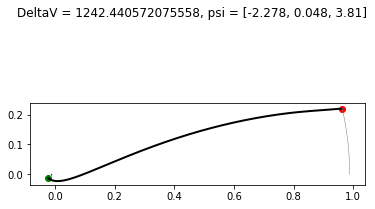

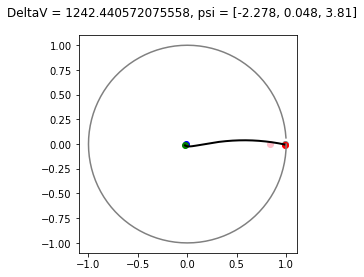

In [9]:
if __name__ == '__main__':
    Dv, psi = pygmo_es()
    path = launch_sim(psi)
    orbitplot2d(path, psi)
    orbitplot_non_inertial(path, psi)
    

In [ ]:
saddle_space().get_bounds()